In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
path = './dataFolder/AffineTransformation/'

In [3]:
MIN_MATCH_COUNT = 10
img1 = cv.imread(path + 'M3_1/M3_ventHW_full.png',0)          # queryImage
pt1_file = pd.read_csv(path + 'M3_1/Results.csv')
sensor1 = pd.read_csv(path + 'M3_1/M3_ventHW_fullconvert.csv')


img2 = cv.imread(path + 'M13_2/m13right_ventHW_full.png',0)   # trainImage
pt2_file = pd.read_csv(path + 'M13_2/Results.csv')
sensor2 = pd.read_csv(path + 'M13_2/m13right_ventHW_fullconvert.csv')

In [4]:
pts_img1 = np.array(list(zip(pt1_file.X.values,pt1_file.Y.values)))
pts_img2 = np.array(list(zip(pt2_file.X.values, pt2_file.Y.values)))

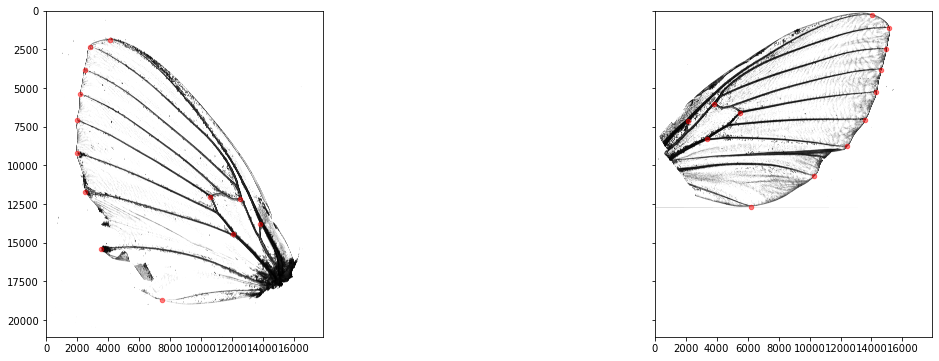

In [5]:
f, ax = plt.subplots(1,2, figsize = (20,6), sharex = True, sharey = True)
ax = ax.ravel()


ax[0].imshow(img1, cmap = 'gray')
ax[0].scatter(pt1_file.X.values, pt1_file.Y.values, 
                c = 'red',
                s = 20, 
                alpha=0.5)

ax[1].imshow(img2, cmap = 'gray')
ax[1].scatter(pt2_file.X.values, pt2_file.Y.values, 
                c = 'red',
                s = 20, 
                alpha=0.5)

In [6]:
len(pts_img1), len(pts_img2)

(13, 13)

In [7]:
# try manual points

# Calculate Homography
h, status = cv.findHomography(pts_img1, pts_img2)

In [8]:
# Warp source image to destination based on homography
im_out = cv.warpPerspective(img1, h, 
                            (img2.shape[1],img2.shape[0]))

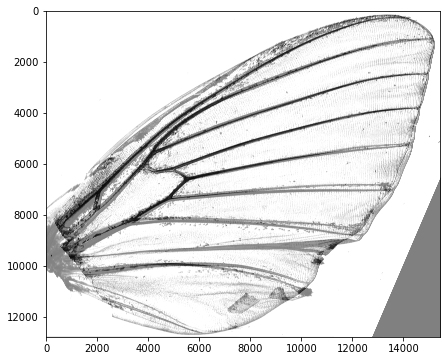

In [10]:
f = plt.figure(figsize = (10,6))
plt.imshow(img2, cmap = 'gray')
plt.imshow(im_out, cmap = 'gray' , alpha=0.5)

In [11]:
h

array([[-9.07204729e-01, -2.62150235e-01,  1.81404225e+04],
       [-3.37024831e-01,  8.17088657e-01,  2.09816445e+02],
       [-7.87802667e-06,  4.85935105e-06,  1.00000000e+00]])

In [12]:
s1 = np.float32(list(zip(sensor1.iloc[:,2].values, sensor1.iloc[:,3].values))).reshape(-1,1,2)

In [13]:
# s1 = np.array([sensor1.iloc[:,2]], [sensor1.iloc[:,3]])
s1_out = cv.perspectiveTransform(s1, h)

In [14]:
s1_out[:,0]

array([[10318.598  , 10990.097  ],
       [10334.694  , 10994.156  ],
       [12270.725  ,  8491.855  ],
       [12294.49   ,  8490.396  ],
       [13471.467  ,  6804.0396 ],
       [ 5670.6753 ,  6521.4062 ],
       [ 6568.0674 ,  6316.1895 ],
       [ 9148.696  ,  5806.016  ],
       [14121.828  ,  5213.0435 ],
       [14471.416  ,  3823.6973 ],
       [14503.953  ,  3828.929  ],
       [14798.001  ,  2485.3633 ],
       [14831.893  ,  2490.506  ],
       [15039.219  ,  1166.4896 ],
       [15077.133  ,  1169.7472 ],
       [ 5464.429  ,  6501.081  ],
       [ 3556.4312 ,  8092.6963 ],
       [13100.551  ,   274.32867],
       [14112.567  ,   353.58017],
       [14146.133  ,   357.89682]], dtype=float32)

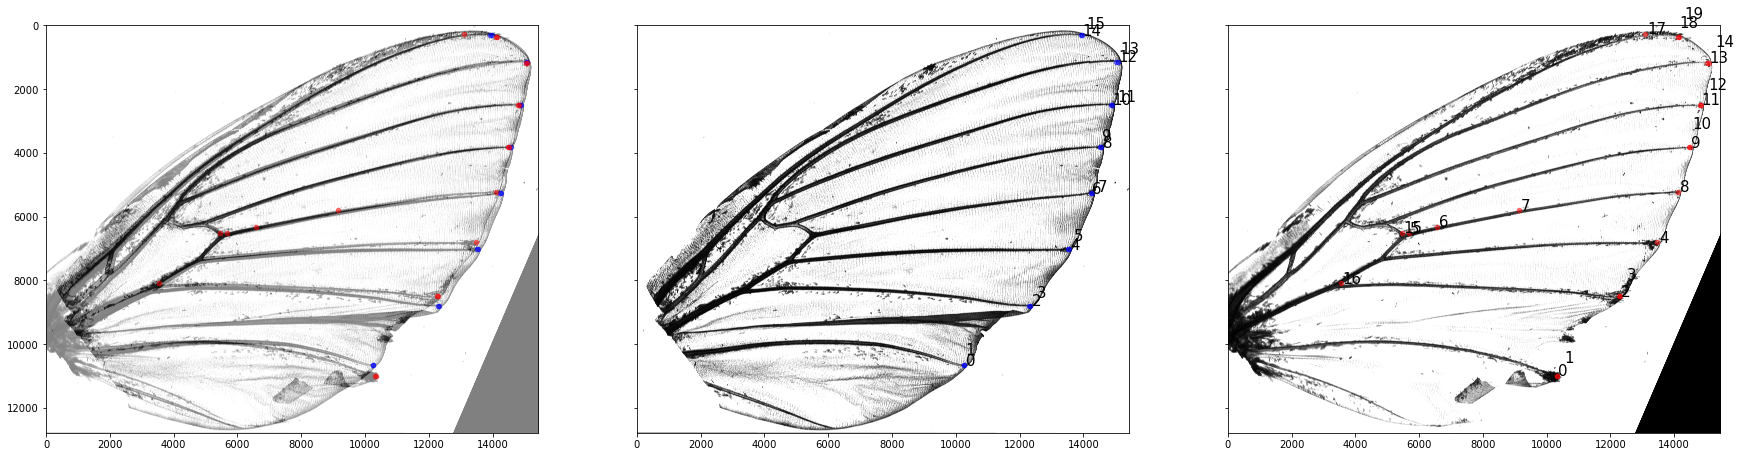

In [67]:
f, ax = plt.subplots(1, 3, figsize = (10*3,12), sharex = True, sharey = True)
ax = ax.ravel()


# draw the overlap
ax[0].imshow(img2, cmap = 'gray')
ax[0].scatter(sensor2.iloc[:,2].values, sensor2.iloc[:,3].values,
           c = 'blue', 
           s = 20, 
           alpha = 0.5)
ax[0].imshow(im_out, cmap = 'gray', alpha = 0.5)
ax[0].scatter(s1_out[:,0,0], s1_out[:,0,1],
           c = 'red',
           s = 20, 
           alpha = 0.5)


# first wing with sensors
ax[1].imshow(img2, cmap = 'gray')
ax[1].scatter(sensor2.iloc[:,2].values, sensor2.iloc[:,3].values,
           c = 'blue', 
           s = 20, 
           alpha = 0.5)
#adding text inside the plot
text = 0
previous_x = 0
previous_y = 0
for ii in sensor2.iterrows():
    x = ii[1][2]
    y = ii[1][3]
    
    if abs(x - previous_x) < 100:
        x = x + np.random.random_sample(size = 1)[0]*200
    if abs(y - previous_y) < 100:
        y = y - np.random.random_sample(size = 1)[0]*600
    ax[1].text(x + 50, y, str(text), fontsize = 15)
    previous_x = ii[1][2]
    previous_y = ii[1][3]
    text+=1


# second transformed wing with sensors 
ax[2].imshow(im_out, cmap = 'gray')
ax[2].scatter(s1_out[:,0,0], s1_out[:,0,1],
           c = 'red',
           s = 20, 
           alpha = 0.5)
#adding text inside the plot
text = 0
previous_x = 0
previous_y = 0
for ii in s1_out[:,0]:
    x = ii[0]
    y = ii[1]
    if abs(x - previous_x) < 200:
        x = x + np.random.random_sample(size = 1)[0]*200
    if abs(y - previous_y) < 200:
        y = y - np.random.random_sample(size = 1)[0]*600
    ax[2].text(x + 50, y, str(text), fontsize = 15)
    previous_x = ii[0]
    previous_y = ii[1]
    text+=1